In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [90]:
df = pd.read_csv('/Users/cgarg/Documents/UMAFall_Subject_16_Fall_forwardFall_13_2016-06-01_22-30-56.csv',delimiter=';')


In [91]:
print('Sorting by timestamp')
df.sort_values(by=['TimeStamp'])
print(df[['TimeStamp',' X-Axis', ' Y-Axis', ' Sensor ID']].head(25)) 

Sorting by timestamp
    TimeStamp    X-Axis    Y-Axis   Sensor ID
0         107  0.182183  0.977138           0
1         107  0.182428  0.979152           0
2         107  0.181329  0.979335           0
3         107  0.181695  0.980373           0
4         107  0.183099  0.982936           0
5         107  0.180352  0.982753           0
6         107  0.178705  0.980739           0
7         107  0.180780  0.980434           0
8         107  0.182244  0.982326           0
9         108  0.182244  0.985438           0
10        108  0.181268  0.984157           0
11        108  0.179864  0.984828           0
12        108  0.181634  0.984218           0
13        108  0.178094  0.984157           0
14        108  0.179071  0.983424           0
15        108  0.178521  0.983485           0
16        108  0.179864  0.983974           0
17        108  0.178705  0.981288           0
18        108  0.178705  0.980739           0
19        108  0.177057  0.982082           0
20        108

In [92]:
# applying v=u+at
df['v-x'] = 0
df['v-y'] = 0
df['v-z'] = 0
df['Cum-X'] = 0
df['Cum-Y'] = 0
df['Cum-Z'] = 0
for i in range(2, len(df)): 
    df.loc[i, 'v-x'] = df.loc[i-1, 'v-x'] + (df.loc[i-1, ' X-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-X'] = df.loc[i-1, 'Cum-X'] + (df.loc[i, 'v-x'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-y'] = df.loc[i-1, 'v-y'] + (df.loc[i-1, ' Y-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Y'] = df.loc[i-1, 'Cum-Y'] + (df.loc[i, 'v-y'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-z'] = df.loc[i-1, 'v-y'] + (df.loc[i-1, ' Y-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Z'] = df.loc[i-1, 'Cum-Z'] + (df.loc[i, 'v-z'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))


print(df[['TimeStamp',' X-Axis', 'v-x', 'Cum-X',' Y-Axis', 'v-y', 'Cum-Y',' Z-Axis', 'v-z', 'Cum-Z']].head(30))

    TimeStamp    X-Axis        v-x        Cum-X    Y-Axis         v-y  \
0         107  0.182183   0.000000     0.000000  0.977138    0.000000   
1         107  0.182428   0.000000     0.000000  0.979152    0.000000   
2         107  0.181329   0.000000     0.000000  0.979335    0.000000   
3         107  0.181695   0.000000     0.000000  0.980373    0.000000   
4         107  0.183099   0.000000     0.000000  0.982936    0.000000   
5         107  0.180352   0.000000     0.000000  0.982753    0.000000   
6         107  0.178705   0.000000     0.000000  0.980739    0.000000   
7         107  0.180780   0.000000     0.000000  0.980434    0.000000   
8         107  0.182244   0.000000     0.000000  0.982326    0.000000   
9         108  0.182244   1.787818     1.787818  0.985438    9.636615   
10        108  0.181268   1.787818     1.787818  0.984157    9.636615   
11        108  0.179864   1.787818     1.787818  0.984828    9.636615   
12        108  0.181634   1.787818     1.787818  0.

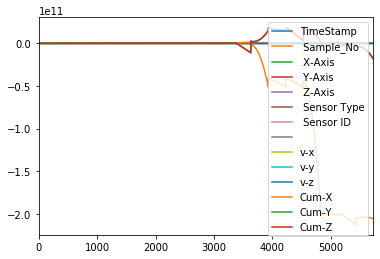

In [93]:
df.plot();

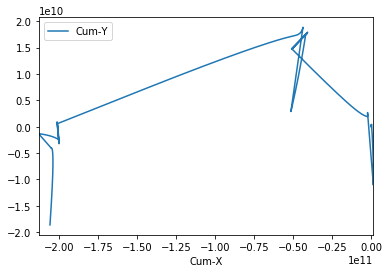

In [94]:
df.plot(x='Cum-X', y='Cum-Y')

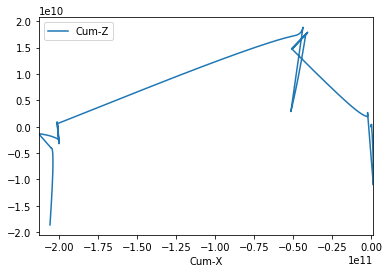

In [95]:
df.plot(x='Cum-X', y='Cum-Z')

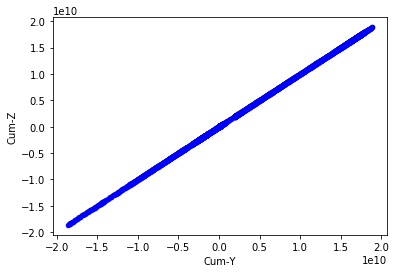

In [97]:
df.plot(kind='scatter',x='Cum-Y',y='Cum-Z',color='blue')

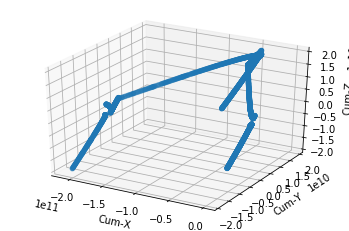

In [98]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['Cum-X'], df['Cum-Y'], df['Cum-Z'])
threedee.set_xlabel('Cum-X')
threedee.set_ylabel('Cum-Y')
threedee.set_zlabel('Cum-Z')
plt.show()